##1D Elementary Cellular Automata: Coding!
Let's create the system-state as a list

In [1]:
state = [0,0,0,0,0,0]  #starting state
n = len(state)  #the "len" function grabs the length of a list, for our use later
print(n)

6


Instead of maually setting the starting state, we can initialize the system to a random state with a loop and a bunch of random checks:

In [2]:
import random
n = 10000
chance = .5
state = []
for i in range(n):
  if random.random()<chance:
    state.append(1)
  else:
    state.append(0)

#print(state)   #note about printing lists: print(*state) would only be necessary if it was procedurally generated, like range(10)

This can be simplified with the *numpy* package, which generates an entire batch of numbers at once. Numpy generates *arrays*, which are basically like list but slightly different. Arrays
1. must contain numbers,
2. have to be pre-*allocated* (size declared when they're made, no append function), and
3. are much faster.

They also print nicely by default!

In [3]:
import numpy as np   #shortening numpy to np is convention, but you could call this whatever.
n = 20
chance = .75
rands = np.random.rand(n)   #  n random floats in (0,1)
print(rands)
state  = rands<chance     #simultaneously checks all elements of rands against that threshold, makes boolean array correspondingly
print(state)

ModuleNotFoundError: No module named 'numpy'

But we want to have 1's and 0's, not booleans. There's a function for casting, but there's also the neat trick of just multiplying by 1:

In [72]:
state = 1*state
print(state)

[1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1]


Great! Now we want to actually evolve the system according to a rule.

In [73]:
rule = [0,1,1,0,1,0,0,1]   #a list of 8 numbers, corresponding to the 8 parent states (in decreasing binary order, i.e. 111 parents are first and 000 last)

newState = np.empty(n) # create a length-n array to hold our new state.

for i in range(n):
  Lindex = (i-1) % n    #left parent, wrapping around if out of bounds
  Rindex = (i+1) % n    #similarly for right parent

  #now we want to convert the parent states into one of the 8 numbers, so we can reference our rule.
  #we could do a bunch of "if" statements here, or make a dictionary,
  #but turning a binary code into an index is much cleaner!
  parentCode = 4*state[Lindex]+2*state[i]+1*state[Rindex]

  parentCode = 7-parentCode   #since by convention the "111" parent (coded as 7, above) is *first* in our rule, we have to flip it here: 7->0th index, 0->7th index
  parentCode = int(parentCode) # just to be sure this is registering as an int instead of a float (odd quirk, from debugging)

  newState[i] = rule[parentCode]   #what's the ith element of the new state going to be, according to the rule?

print(newState)  #show what the system has become
state = newState  #to take another step, we need to overwrite "state" into this new state so we can do it again!

[1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]


Great! We can run that as many times as we like, and the core function of our system is working. But we can put it in a loop to automate that and display its evolution vertically:

In [74]:
T = 20  # time limit for our simulation

print(state)  # print our starting state

for t in range(T):   #little t is our current time

  ########### all our update code from before ###########
  newState = np.empty(n) # create a length-n array to hold our new state.

  for i in range(n):
    Lindex = (i-1) % n    #left parent, wrapping around if out of bounds
    Rindex = (i+1) % n    #similarly for right parent

    #now we want to convert the parent states into one of the 8 numbers, so we can reference our rule.
    #we could do a bunch of "if" statements here, or make a dictionary,
    #but turning a binary code into an index is much cleaner!
    parentCode = 4*state[Lindex]+2*state[i]+1*state[Rindex]

    parentCode = 7-parentCode   #since by convention the "111" parent (coded as 7, above) is *first* in our rule, we have to flip it here: 7->0th index, 0->7th index
    parentCode = int(parentCode) # just to be sure this is registering as an int instead of a float (odd quirk, from debugging)

    newState[i] = rule[parentCode]   #what's the ith element of the new state going to be, according to the rule?

  print(newState)  #show what the system has become
  state = newState  #to take another step, we need to overwrite "state" into this new state so we can do it again!
  ############################################

[1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
[0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
[1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
[0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
[1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
[1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.]
[0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
[1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
[1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
[0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
[1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 1

To display this in a nicer manner, we'll introduce the package Matplotlib, particularly its subpackage pyplot, which makes Python display things more like Matlab. In our case, it'll display a matrix of 1's and 0's as differently colored cells.

(The one annoyance is, it expects a 2D array, and our state is a simple 1D array, so we have to temporarily package it into its own list, making it register as a (1 x n) 2D array.)

[1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
[1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.]
[0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
[1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
[1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
[0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
[1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
[0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
[1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
[1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.]
[0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
[1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
[1. 1. 0

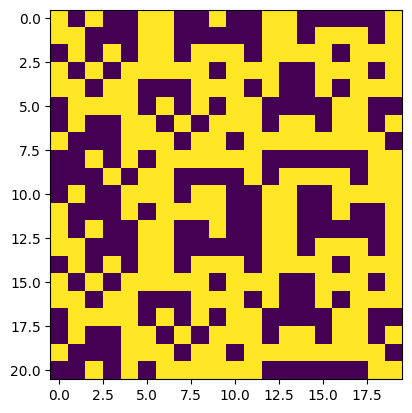

In [75]:
import matplotlib.pyplot as plt   #again, this is convention---so much so that it auto-completes in colab!

T = 20  # time limit for our simulation

print(state)  # print our starting state

####
states = []   #parent list that will hold all our system's states
states.append(state)  #its first element will be the starting state
#####

for t in range(T):   #little t is our current time

  newState = np.empty(n) # create a length-n array to hold our new state.

  for i in range(n):
    Lindex = (i-1) % n    #left parent, wrapping around if out of bounds
    Rindex = (i+1) % n    #similarly for right parent

    #now we want to convert the parent states into one of the 8 numbers, so we can reference our rule.
    #we could do a bunch of "if" statements here, or make a dictionary,
    #but turning a binary code into an index is much cleaner!
    parentCode = 4*state[Lindex]+2*state[i]+1*state[Rindex]

    parentCode = 7-parentCode   #since by convention the "111" parent (coded as 7, above) is *first* in our rule, we have to flip it here: 7->0th index, 0->7th index
    parentCode = int(parentCode) # just to be sure this is registering as an int instead of a float (odd quirk, from debugging)

    newState[i] = rule[parentCode]   #what's the ith element of the new state going to be, according to the rule?

  #note: this level of indentation means we've computed all n states
  print(newState)  #show what the system will become

  state = newState  #to take another step, we need to overwrite "state" into this new state so we have a new stepping-off point!

  ####after updating, add the state to the master record
  states.append(newState)
  #####

#this level of indentation is after the entire simulation
plt.imshow(states)

Putting it all together, this is all the relevant code we've made!

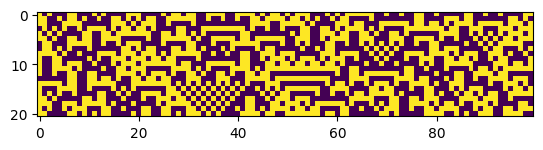

In [76]:
#everything in one place! This is all copied from above, but I've commented out redundant print statements we no longer need

import numpy as np   #shortening numpy to np is convention, but you could call this whatever.
import matplotlib.pyplot as plt

n = 100
chance = .5

rule = [0,1,1,0,1,0,0,1]
T = 20

#make the starting state
rands = np.random.rand(n)   #  n random floats in (0,1)
#print(rands)
state  = rands<chance     #simultaneously checks all elements of rands against that threshold, makes boolean array correspondingly
#print(state)
state = 1*state   #turn into 1's and 0's
#print(state)


#now we start the updating:
states = []   #parent list that will hold all our system's states
states.append(state)  #its first element will be the starting state

for t in range(T):   #little t is our current time

  newState = np.empty(n) # create a length-n array to hold our new state.

  #loop down the line of cells
  for i in range(n):
    Lindex = (i-1) % n    #left parent, wrapping around if out of bounds
    Rindex = (i+1) % n    #similarly for right parent

    #now we want to convert the parent states into one of the 8 numbers, so we can reference our rule.
    #we could do a bunch of "if" statements here, or make a dictionary,
    #but turning a binary code into an index is much cleaner!
    parentCode = 4*state[Lindex]+2*state[i]+1*state[Rindex]

    parentCode = 7-parentCode   #since by convention the "111" parent (coded as 7, above) is *first* in our rule, we have to flip it here: 7->0th index, 0->7th index
    parentCode = int(parentCode) # just to be sure this is registering as an int instead of a float (odd quirk, from debugging)

    newState[i] = rule[parentCode]   #what's the ith element of the new state going to be, according to the rule?

  #note: this level of indentation means we've computed all n states
  #print(newState)    #I've commented this out, since we have the imshow version!

  state = newState  #to take another step, we need to overwrite "state" into this new state so we have a new stepping-off point!

  states.append(state)   #after updating, add the state to the master record

#this level of indentation is after the entire simulation
plt.imshow(states)


#Functions

 Rather than copy-pasting all those lines of code, we can package them into *functions*. We do this with  "def ________():", and then whenever we call _______() it will do all the code inside the definition.

In [77]:
#all the set-up code from before
def initialize():
  n = 10
  chance = .5
  rands = np.random.rand(n)   #  n random floats in (0,1)
  print(rands)
  state  = rands<chance     #simultaneously checks all elements of rands against that threshold, makes a boolean array correspondingly
  print(state)
  state = 1*state   #turn into 1's and 0's
  print("the starting state is:",state)

Note that it didn't actually run the function yet! For that we have to *call* it:

In [78]:
initialize()

[0.66132099 0.5820229  0.11855936 0.08263009 0.54974944 0.49960473
 0.68094275 0.75009927 0.1580175  0.41273416]
[False False  True  True False  True False False  True  True]
the starting state is: [0 0 1 1 0 1 0 0 1 1]


One problem: right now the variable `state` is *local* to the function, meaning it only exists inside this function, and disappears at the end! We can check that `state` is the same as it was before, untouched by our supposed "re-initializing":



In [79]:
print(state)

[1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 0.]


We can have a function affect variables outside by declaring that `state` is *global*:

In [80]:
#second attempt, with global state variable
def initialize():
  global state   #lets the function affect the variable "state" from outside

  n = 10
  chance = .5
  rands = np.random.rand(n)   #  n random floats in (0,1)
  print(rands)
  state  = rands<chance     #simultaneously checks all elements of rands against that threshold, makes boolean array correspondingly
  print(state)
  state = 1*state   #turn into 1's and 0's
  print("the starting state is:",state)

We can do a little better by feeding a function *arguments*, so parameters can be set each time we call it. If we put a declaration statement, that will act as a default value.

In [81]:
#third version, with arguments for custom starting conditions
def initialize(n=10, chance = .5):
  global state

  rands = np.random.rand(n)   #  n random floats in (0,1)
  print(rands)   #check that it's working
  state  = 1*(rands<chance)     #simultaneously checks all elements of rands against that threshold, makes boolean array correspondingly, and turns it into integers
  print("the starting state is:",state)

In [82]:
initialize()

[0.24834893 0.39593941 0.02927104 0.91486151 0.87502778 0.54606521
 0.45921425 0.48138518 0.92054167 0.68960201]
the starting state is: [1 1 1 0 0 0 1 1 0 0]


In [83]:
initialize(20, .1)

[0.4577595  0.34169286 0.02721158 0.58147648 0.96464573 0.74218615
 0.564852   0.25352086 0.95678679 0.26907725 0.60410324 0.8528884
 0.5165009  0.63398306 0.62466444 0.41311983 0.39343595 0.04054967
 0.73256113 0.15675983]
the starting state is: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


Now, we can package together our time-evolution logic into a function that advances the `state` variable one time-step:

In [84]:
def step(rule = [0,1,1,0,1,0,0,1]):
  global state  #we want this function to affect the 'state' variable from outside

  n = len(state)  #inside this function, we need to know how big our world is

  newState = np.empty(n) # create a length-n array to hold our new state.

  for i in range(n):
    Lindex = (i-1) % n    #left parent, wrapping around if out of bounds
    Rindex = (i+1) % n    #similarly for right parent

    #now we want to convert the parent states into one of the 8 numbers, so we can reference our rule.
    #we could do a bunch of "if" statements here, but just turning a binary code into an index is much cleaner!
    parentCode = 4*state[Lindex]+2*state[i]+1*state[Rindex]

    parentCode = 7-parentCode   #since by convention the 111 parent (coded as 7, above) is first in our rule, we have to flip it here: 7->0th index, 0->7th index
    parentCode = int(parentCode) # just to be sure this is registering as an int instead of a float (debugged)

    newState[i] = rule[parentCode]   #what's the ith element of the state going to be?

  #print(newState)  #show what the system has become
  state = newState  #to take another step, we need to overwrite state into this new state so we can do it again!

Now, putting it together looks cleaner:

In [85]:
#variables for initializing
n = 20
chance = .5

#variables for updating
T = 20
rule = [0,1,1,0,1,0,0,1]

#make the state
initialize(n, chance)
print(state)

#update the state
for t in range(T):
  step(rule)
  print(state)


[0.99863531 0.62176762 0.33840753 0.77198653 0.62365625 0.84465481
 0.64207673 0.83986621 0.72277002 0.72470344 0.79190961 0.56382715
 0.69353444 0.2153581  0.54780329 0.89419508 0.68620603 0.64079194
 0.94251342 0.25735415]
the starting state is: [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.]
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
[0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
[0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
[0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
[0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.]
[1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
[0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.

Again, let's work toward displaying it in color with `matshow` (`pyplot` is already imported). We can display each row individually:

[0.20976096 0.46654978 0.46376831 0.44275573 0.01987473 0.2288803
 0.05536745 0.9112182  0.6987537  0.95939728 0.90124728 0.42505107
 0.97010225 0.02467071 0.33430262 0.38806422 0.93793395 0.23371531
 0.56478363 0.051335  ]
the starting state is: [1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1]
[1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1]


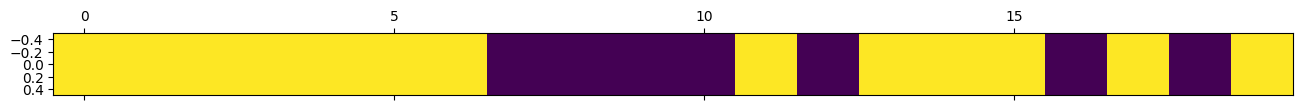

In [86]:
#variables for initializing
n = 20
chance = .5

#variables for updating
T = 20
rule = [0,1,1,0,1,0,0,1]

initialize(n, chance)
print(state)
plt.matshow([state]) # or plt.matshow(state.reshape(1,n))


We can animate it by repeatedly overwriting the one-row picture (importing the `IPython.display` command `clear_output()` to erase the row before printing a new one).

(annoying note: to use `matshow` inside a loop, you need to also force it to update what's visually shown with `show()`, rather than just changing the data that *will* be plotted. Contrary to its name, if you leave this out, it will only actually display the final state, after the whole program finishes!)

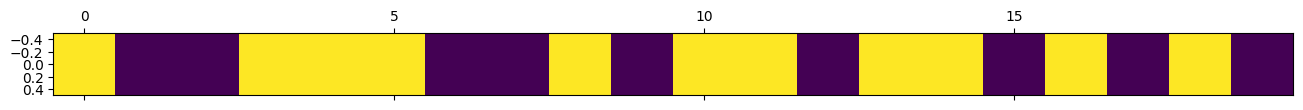

In [87]:
import time
from IPython.display import clear_output

#update the state
for t in range(T):
  clear_output()
  step(rule)
  plt.matshow([state])# or plt.imshow(state.reshape(1,n))

  plt.show() # need this inside loop to force it to re-draw

  time.sleep(1)


But that's basically impossible to notice patterns in... In order to display the evolution vertically rather than animating in time, we need to use a 2D array (we'll call it `allStates`), and fill in each row with the `state` 1D array as we update it. We can use our previously-defined `step()` function to do that updating:

In [88]:
def run():
  global T, state, rule, allStates   #a bunch of things should be shared into and out of this function!

  n = len(state)  #inside this function, we need to know how big our world is

  allStates = np.empty((T,n))   #creates an empty array: T tall, n wide
  allStates[0,:] = state   #the first row (all elements) are set to be the starting state

  #update the state
  for t in range(1,T):
    step(rule)
    allStates[t,:] = state

Finally, we set up the relevant parameters and call our `run()` function:

[0.22952836 0.74991375 0.57541817 0.71540123 0.66210539 0.68080995
 0.34915653 0.94483913 0.98019726 0.16283506 0.54575814 0.12810371
 0.67875406 0.63743236 0.7092615  0.64767995 0.45929155 0.47817811
 0.72070345 0.837963   0.82604587 0.36255871 0.79186222 0.1730917
 0.14909609 0.61262242 0.00565658 0.32583276 0.84185821 0.04607925
 0.84821893 0.01738265 0.27450307 0.59502786 0.3535276  0.86147326
 0.54477473 0.59154476 0.32807873 0.86107302 0.48403283 0.21280761
 0.27933392 0.37908708 0.79847519 0.04367772 0.2401359  0.70775461
 0.89527104 0.84727134 0.88566347 0.87766161 0.65097305 0.92562419
 0.45503102 0.24762425 0.36210536 0.50045984 0.63749614 0.66609706
 0.34075378 0.04022331 0.7376194  0.75532171 0.62991839 0.11525104
 0.83503813 0.24507756 0.81359481 0.15726967 0.46714433 0.63179571
 0.58074924 0.09561795 0.68014383 0.55062776 0.36613821 0.81194712
 0.14229656 0.55011429 0.95302786 0.04136965 0.73783239 0.58774658
 0.84207072 0.4506593  0.03073999 0.5042788  0.05146183 0.08406

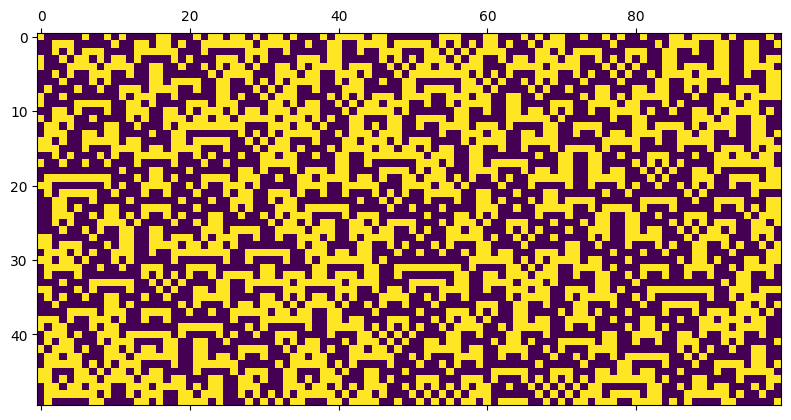

In [89]:
#variables for initializing
n = 100
chance = .5

#variables for updating
T = 50
rule = [0,1,1,0,1,0,0,1]  #105

initialize(n, chance)
print(state)
run()
plt.matshow(allStates)

Finally, we might want to use the rule-number encoding system. There are several ways to do this, but here's a way which uses some finagling with the binary representation function `bin()`.

Also, if we want to make the display image bigger, there's some commands for that.

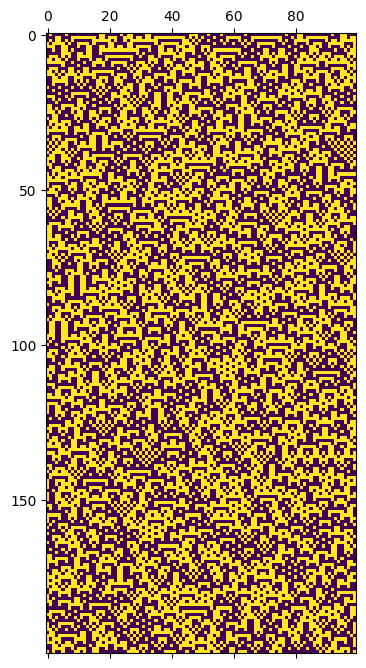

In [99]:
#code for turning a code-number into a rule, running the simulation, and making the display bigger

################
#chunk of code for turning a number into a list of its binary representation:
codeNum = 22  #was 105. try 110, 73, 22, 32
codeNum = bin(codeNum)
codeNum = codeNum[0]+codeNum[2:]
rule = list(codeNum)
while(len(rule)<8):
  rule.insert(0,0)
#############

n = 100
T = 200
chance = .2
initialize(n, chance)
run()
# f = plt.figure()   #rigamarole for making the plot bigger: you increase the canvas before showing it
# f.set_figwidth(10)  #gives new max width
# f.set_figheight(10)  #gives new max height
f = plt.matshow(allStates)

In [91]:
#combined and cleaned up initialize function
def initialize(n=10, chance = .5, ruleCode = 105):
  global state, rule

  rands = np.random.rand(n)   #  n random floats in (0,1)
  state  = 1*(np.random.rand(n)<chance)     #simultaneously checks all elements of rands against that threshold, makes boolean array correspondingly, and turns it into integers

  ruleCode = bin(ruleCode)
  ruleCode = ruleCode[0]+ruleCode[2:]
  rule = list(ruleCode)
  while(len(rule)<8):
    rule.insert(0,0)
###############


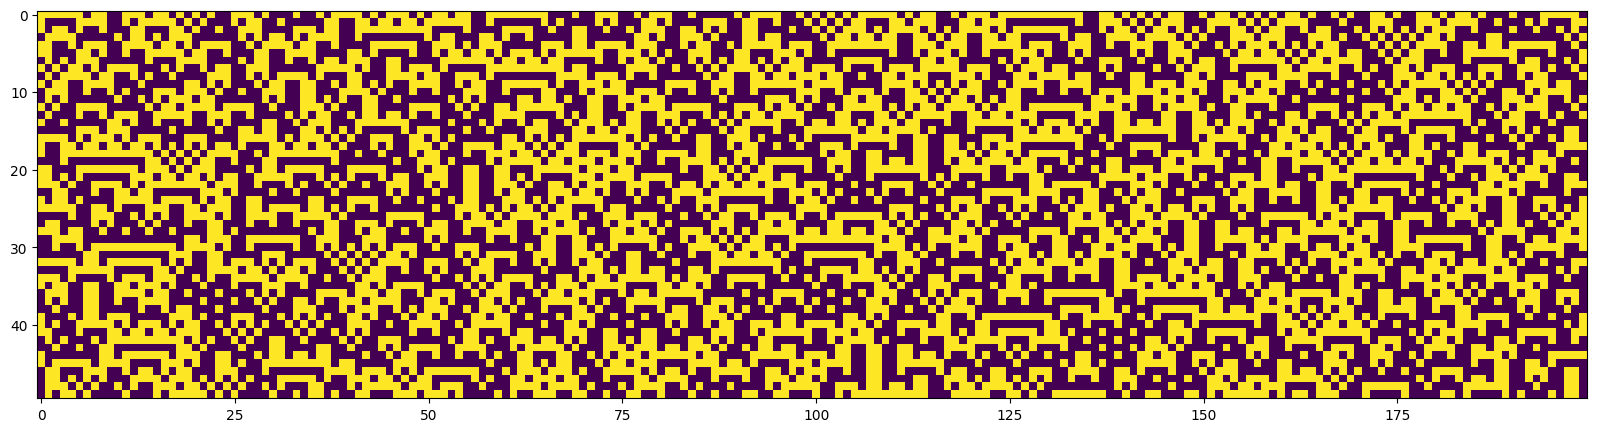

In [92]:
n = 200
chance = .5
rule = 105
T = 50
initialize(n, chance, rule)
run()
f = plt.figure()   #rigamarole for making the plot bigger: you increase the canvas before showing it
f.set_figwidth(20)  #gives new max width
f.set_figheight(10)  #gives new max height
plt.imshow(allStates)

#2D Grid
In preparation for 2D cellular automata, let's initialize and manipulate some 2D arrays.




First, try without numpy:

In [93]:
n = 10
board = []  #going to be an (n x n) grid
row = []
for x in range(n):
  row.append(0)
print(row)


for y in range(n):
  board.append(row)

print(board)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [94]:
board[1][5] = 6
print(board)

[[0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0]]


That's annoying, and looks terrible. Now, with `numpy`:

In [95]:
board2 = np.zeros((n,n))
print(board2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [96]:
board2[1][5] = 5
board2[2,5] = -3
print(board2)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Testing other array-initialization formats:

In [97]:
z = np.zeros([10,4])
print(z)
r = np.random.rand(3,4)
print(r)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.64353906 0.02243034 0.46147861 0.68920027]
 [0.8930295  0.21104017 0.4465922  0.21730856]
 [0.54617443 0.10117414 0.96732623 0.32139048]]


Now go see the Game of Life implementation notebook!